---
title: 'Лабораторна робота №8. Структура даних граф. Алгоритми на графах'
description:
   Документ зроблено за допомогою [Quarto](https://quarto.org/)
author: "Яркоий Тимофій"
date: "05.29.2024"
lang: ukr
format:
  html:
    code-fold: true
    toc: true # меню
    toc_float: # спливаюче меню  
      collapsed: true # авто
      number_sections: true
jupyter: python3
---

## Короткі теоретичні відомості 

### Структура даних граф

*Граф* – це абстрактний тип даних, який призначений для реалізації концепцій неорієнтованого та орієнтованого графів, що походять з теорії графів. Граф складається з вузлів і вершин.

*Вершина (вузол*) - головна частина графа. Може мати ім'я, яке називається «ключ». Також вершина може мати додаткову інформацію, яку ми назвемо «корисним навантаженням».

*Ребро (дуга)* - інша фундаментальна частина графа. Ребро, що з'єднує дві вершини, показує наявність між ними певних відносин. Ребра можуть бути одно- та двонапрямленим.

Якщо всі ребра графа однонапрямлені, ми називаємо його орієнтованим графом чи диграфом (directed) 727.png).


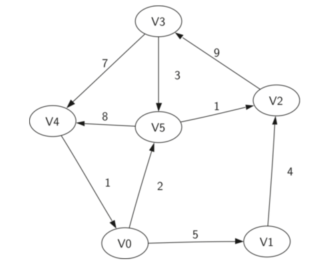

Ребра можуть мати вагу, що показує вартість переміщення від однієї вершини до іншої. Наприклад, у графі доріг, що зв'язують міста, вага ребра може відображати відстань між двома населеними пунктами.

Формально граф може бути поданий як $G$, де $G=(V,E)$. Тут $V$ множинаіч вершин графа, а $E$ множинаіч ребер, що їх з'єднуютьКожнене ребро є кортежем $(v,w)$, де $w, v \in V$. Сюди можна додавати третій компонент, що відображає вагу ребра. Підграф $s$ – це набір ребер $e$ і вершин $v$ таких, що $e \subset E$ і $v \subset V$.


*Шлях у графі* – це послідовність вершин, з’єднаних ребрами. Формально шлях можна визначити, як $w_1,w_2,...,w_n$ такий, що $(w_i,w_(i+1))∈E$ для всіх $1 ≤ i ≤n-1$.

Довжиною шляху без ваг є кількість у ньому ребер: $n-1$. Зважений шлях у графі буде сумою ваг усіх ребер, що входять до нього. Наприклад, на рис. 1 шляхом із $V_3$ у $V_1$ є послідовність вершин $(V_3,V_4,V_0,V_1)$. Ребрами – $(v_3,v_4,7),(v_4,v_0,1),(v_0,v_1,5)$.

Цикл у спрямованому графі починається і закінчується в одній і тій самій вершині. Наприклад, на рис. 1 циклом буде шлях $(V_5,V_2,V_3,V_5)$. Граф без циклів називається ациклічним. Орієнтований граф без циклів – це ациклічний спрямований граф або DAG (directed acyclic graph). Нижче буде показано, що з його допомогою можна розв’язати деякі важливі завдання.  

### Операції з графами

`Graph()` – створює новий порожній граф.

`addVertex(vert)` – додає в граф об’єкт типу Vertex.

`addEdge(fromVert, toVert)` – додає в граф нове напрямлене ребро, що з’єднує дві вершини.

`addEdge(fromVert, toVert, weight)` – додає в граф нове зважене напрямлене ребро, що з’єднує дві вершини.

`getVertex(vertKey)` – знаходить у графі вершину `vertKey`.

`getVertices()` – повертає список усіх вершин графа.

`In` – повертає `True` для оператора форми `vertex in graph`, якщо вершина в графі є, і `False` в іншому випадку. 

### Подання графа

#### Матриця суміжності

Одним з найпростіших способів реалізувати граф є використання двовимірної матриці. 

У ній кожен рядок і стовпчик являють собою вершину графа, а збережене в комірці на перетині рядка $v$ і стовпчика $w$ значення показує, що існує ребро з вершини $v$ до вершини $w$. Коли дві вершини з’єднані,  їх уважають суміжними. Матриця суміжності для орієнтованого графа, наведеного на рис. 1, матиме такий вигляд:

$\begin{pmatrix}
 0&5&0&0&0&2 \\
 0&0&4&0&0&0 \\
 0&0&0&9&0&0 \\
 0&0&0&0&7&3 \\
 1&0&0&0&0&0 \\
 0&0&1&0&8&0 \\
\end{pmatrix}$


#### Список суміжності

Для реалізації розрідженого графа простіше та ефективніше використовувати список суміжності. 

У цьому випадку ми зберігаємо список усіх вершин графа та для кожної вершини зберігаємо список сусідніх вершин. У нашій реалізації класу `Vertex()` буде представлений словником, де ключами будуть вершини, а значеннями – їх ваги. Наприклад, для графа, наведеного на рис. 1, це буде так:

In [125]:
graph = {
    'V0': {'V1': 5, 'V5': 2},
    'V1': {'V2': 4},
    'V2': {'V3': 9},
    'V3': {'V4': 7, 'V5': 3},
    'V4': {'V0': 1}, 
    'V5': {'V2': 1, 'V4': 8},
}


## Приклад реалізації структури даних граф на Python

`Graph` – містить головний список вершин.

`Vertex` – подання в графі.



In [128]:
class Vertex:
    def __init__(self, key):
        # Конструктор класу Vertex
        self.id = key           # Ідентифікатор вершини
        self.connectedTo = {}   # Сусіди вершини та їх ваги

    def addNeighbor(self, nbr, weight=0):
        # Додає зв'язок між поточною вершиною та сусідньою вершиною
        self.connectedTo[nbr] = weight

    def __str__(self):
        # Подання вершини у вигляді рядка
        return str(self.id) + ' connectedTo: ' + str([x.id for x in self.connectedTo])

    def getConnections(self):
        # Повертає сусідні вершини поточної вершини
        return self.connectedTo.keys()

    def getId(self):
        # Повертає ідентифікатор поточної вершини
        return self.id

    def getWeight(self, nbr):
        # Повертає вагу ребра між поточною вершиною та заданою сусідньою вершиною
        return self.connectedTo[nbr]


Клас `Graph`, містить словник, що відображає імена вершин на їхні об’єкти. Також `Graph` надає методи для додавання вершин у граф і зв’язування їх одна з одною. Додатково ми маємо реалізацію методу `__iter__`, що полегшує ітерації по об’єктах `Vertex` у конкретному графі. Разом два методи дають змогу робити ітерації за іменами вершин або безпосередньо за об’єктами:

In [131]:
class Graph:
    def __init__(self):
        # Ініціалізація порожнього словника, що відображає імена вершин на об'єкти Vertex.
        self.vertList = {}
        # Ініціалізація лічильника вершин у графі.
        self.numVertices = 0

    def addVertex(self, key):
        # Збільшення лічильника вершин та створення нового об'єкта Vertex.
        self.numVertices = self.numVertices + 1
        newVertex = Vertex(key)
        # Додавання нової вершини до словника.
        self.vertList[key] = newVertex
        return newVertex

    def getVertex(self, n):
        # Повертає об'єкт Vertex за його ім'ям.
        if n in self.vertList:
            return self.vertList[n]
        else:
            return None

    def __contains__(self, n):
        # Перевіряє, чи міститься вершина з заданим ім'ям у графі.
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        # Додає зв'язок між вершинами з іменами f та t з вагою cost (за замовчуванням – 0).
        if f not in self.vertList:
            # Якщо вершини f ще немає у графі, додаємо її.
            nv = self.addVertex(f)
        if t not in self.vertList:
            # Якщо вершини t ще немає у графі, додаємо її.
            nv = self.addVertex(t)
        # Додаємо зв'язок між вершинами f та t з вагою cost.
        self.vertList[f].addNeighbor(self.vertList[t], cost)

    def getVertices(self):
        # Повертає список імен усіх вершин у графі.
        return self.vertList.keys()

    def __iter__(self):
        # Повертає ітератор, який дозволяє ітерувати по об'єктах Vertex у графі.
        return iter(self.vertList.values())


Продемонструємо роботу з графом на прикладі.

### *Приклад 1.* Створення графа з декількома вершинами та ребрами

In [133]:
# Створення нового графа
g = Graph()

# Додавання вершин
for i in range(1, 6):
    g.addVertex(i)

# Додавання ребер
g.addEdge(1, 2, 5)
g.addEdge(1, 3, 3)
g.addEdge(2, 4, 2)
g.addEdge(3, 4, 7)
g.addEdge(4, 5, 1)
g.addEdge(5, 1, 4)

# Вивід усіх вершин у графі
print("Вершини у графі:", g.getVertices())

# Вивід усіх зв'язків для кожної вершини
for vertex in g:
    print("Для вершини", vertex.getId(), "з'єднані вершини:", [v.getId() for v in vertex.getConnections()])


Вершини у графі: dict_keys([1, 2, 3, 4, 5])
Для вершини 1 з'єднані вершини: [2, 3]
Для вершини 2 з'єднані вершини: [4]
Для вершини 3 з'єднані вершини: [4]
Для вершини 4 з'єднані вершини: [5]
Для вершини 5 з'єднані вершини: [1]


### *Приклад 2*. Вивід ваг усіх ребер для певної вершини:

In [136]:
# Визначення вершини
vertex_id = 1

# Отримання вершини за ідентифікатором
vertex = g.getVertex(vertex_id)

# Вивід ваг усіх зв'язків для цієї вершини
print("Ваги зв'язків для вершини", vertex_id)
for nbr_vertex in vertex.getConnections():
    print("З", vertex_id, "до", nbr_vertex.getId(), "вага:", vertex.getWeight(nbr_vertex))


Ваги зв'язків для вершини 1
З 1 до 2 вага: 5
З 1 до 3 вага: 3


### *Приклад 3.* Візуалізація графа

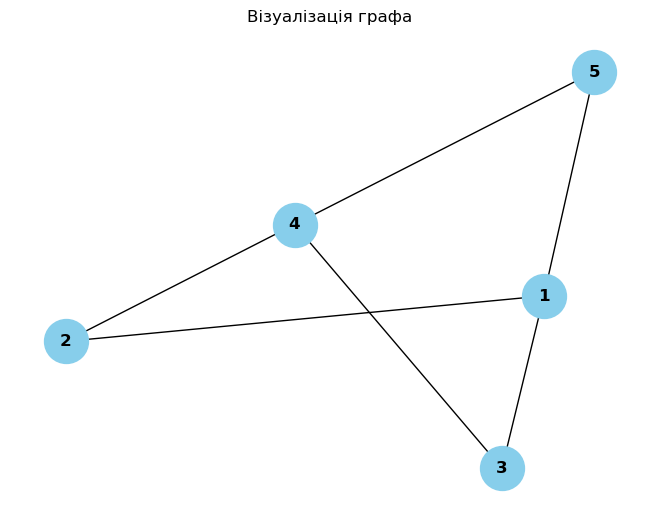

In [138]:
import matplotlib.pyplot as plt
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра
edges = [(1, 2), (1, 3), (2, 4), (3, 4), (4, 5), (5, 1)]

# Додаємо ребра до графа
G.add_edges_from(edges)

# Візуалізуємо граф
nx.draw(G, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
plt.title("Візуалізація графа")
plt.show()


### *Приклад 4.* Візуалізація зваженого графа

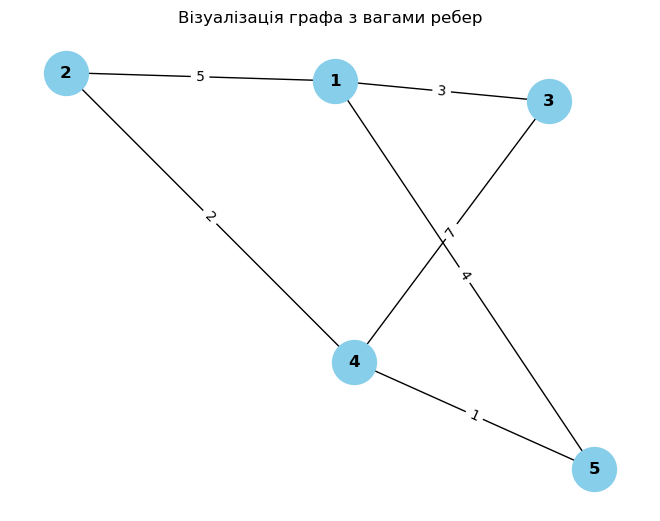

In [142]:
import matplotlib.pyplot as plt
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра з вагами
edges = [(1, 2, 5), (1, 3, 3), (2, 4, 2), (3, 4, 7), (4, 5, 1), (5, 1, 4)]

# Додаємо ребра з вагами до графа
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Визначаємо позиції вершин у графі
pos = nx.spring_layout(G)

# Візуалізуємо граф
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
# Додаємо ваги ребер
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Візуалізація графа з вагами ребер")
plt.show()


### *Приклад 5.* Робота з направленим графом

In [144]:
class Vertex:
    def __init__(self, key):
        # Ініціалізація об'єкта вершини
        self.id = key  # Ідентифікатор вершини
        self.connectedTo = {}  # Список сусідніх вершин та їх ваги

    def addNeighbor(self, nbr, weight=0):
        # Додавання сусідньої вершини та ваги ребра до поточної вершини
        self.connectedTo[nbr] = weight

    def __str__(self):
        # Подання вершини у вигляді рядка
        return str(self.id) + ' connectedTo: ' + str([(x.id, weight) for x, weight in self.connectedTo.items()])

    def getConnections(self):
        # Повертає список сусідніх вершин
        return self.connectedTo.keys()

    def getId(self):
        # Повертає ідентифікатор поточної вершини
        return self.id

    def getWeight(self, nbr):
        # Повертає вагу ребра між поточною вершиною та заданою сусідньою вершиною
        return self.connectedTo[nbr]


class Graph:
    def __init__(self, directed=False):
        # Ініціалізація графа
        self.vertList = {}  # Словник вершин
        self.numVertices = 0  # Лічильник вершин
        self.directed = directed  # Прапорець для вказівки напрямку графа

    def addVertex(self, key):
        # Додавання вершини до графа
        self.numVertices += 1
        newVertex = Vertex(key)  # Створення нової вершини
        self.vertList[key] = newVertex  # Додавання вершини до словника
        return newVertex

    def getVertex(self, n):
        # Повертає вершину за заданим ключем
        return self.vertList.get(n)

    def __contains__(self, n):
        # Перевіряє, чи міститься вершина у графі
        return n in self.vertList

    def addEdge(self, f, t, cost=0):
        # Додавання ребра між вершинами f та t
        if f not in self.vertList:
            self.addVertex(f)  # Додавання вершини f, якщо вона ще не існує
        if t not in self.vertList:
            self.addVertex(t)  # Додавання вершини t, якщо вона ще не існує
        self.vertList[f].addNeighbor(self.vertList[t], cost)  # Додавання сусідньої вершини до вершини f
        if not self.directed:
            # Якщо граф не напрямлений, то додаємо зворотне ребро з вершини t до вершини f
            self.vertList[t].addNeighbor(self.vertList[f], cost)

    def getVertices(self):
        # Повертає список вершин у графі
        return self.vertList.keys()

    def __iter__(self):
        # Перевизначення ітератора для графа
        return iter(self.vertList.values())


# Створення графа
graph = {
    'V0': {'V1': 5, 'V5': 2},
    'V1': {'V2': 4},
    'V2': {'V3': 9},
    'V3': {'V4': 7, 'V5': 3},
    'V4': {'V0': 1}, 
    'V5': {'V2': 1, 'V4': 8},
}

myGraph = Graph(directed=True)  # Створення направленого графа

# Додавання ребер до графа на основі поданого словника
for vertex, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        myGraph.addEdge(vertex, neighbor, weight)

# Виведення графа
for vertex in myGraph:
    print(vertex)


V0 connectedTo: [('V1', 5), ('V5', 2)]
V1 connectedTo: [('V2', 4)]
V5 connectedTo: [('V2', 1), ('V4', 8)]
V2 connectedTo: [('V3', 9)]
V3 connectedTo: [('V4', 7), ('V5', 3)]
V4 connectedTo: [('V0', 1)]


### *Приклад 6.* Візуалізація зваженого графа

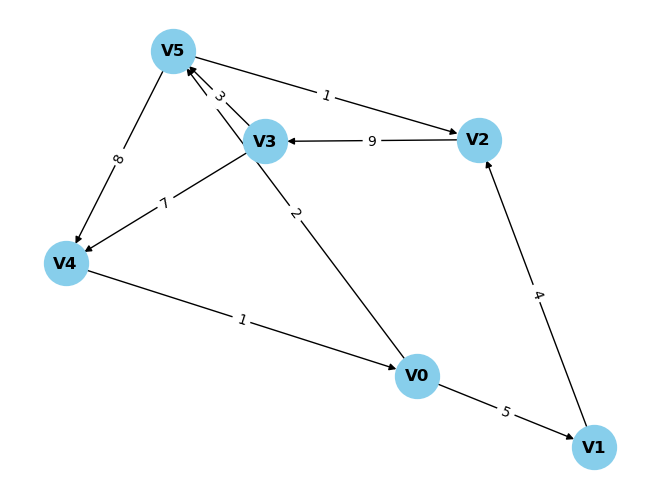

In [147]:
import networkx as nx
import matplotlib.pyplot as plt

# Граф з вагами ребер
graph = {
    'V0': {'V1': 5, 'V5': 2},
    'V1': {'V2': 4},
    'V2': {'V3': 9},
    'V3': {'V4': 7, 'V5': 3},
    'V4': {'V0': 1}, 
    'V5': {'V2': 1, 'V4': 8},
}

# Створення направленого графа
G = nx.DiGraph()

# Додавання вершин та ребер до графа
for vertex, neighbors in graph.items():
    for neighbor, weight in neighbors.items():
        G.add_edge(vertex, neighbor, weight=weight)

# Візуалізація графа
pos = nx.spring_layout(G)  # Позиціонування вершин графа
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")  # Візуалізація графа
labels = nx.get_edge_attributes(G, 'weight')  # Отримання ваг ребер
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)  # Візуалізація ваг ребер
plt.show()  # Відображення графа


## Деякі класичні алгоритми на графах

### Знаходження найкоротших шляхів за допомогою методів бібліотеки Networkx

Для цього застосуємо спеціалізовану бібліотеку `NetworkX`.

Бібліотека `NetworkX` для Python – це потужний інструмент для роботи з графами та мережами. Вона надає різноманітні функції для створення, аналізу та візуалізації графів.

`NetworkX` підтримує різні типи графів, у тому числі орієнтовані та неорієнтовані, зважені та незважені, мультіграфи та інші. Вона має велику кількість вбудованих алгоритмів для роботи з графами, таких як пошук найкоротших шляхів, центральності вершин, знаходження підграфів та інші. `NetworkX` також підтримує візуалізацію графів за допомогою різних графічних бібліотек, таких як `Matplotlib`. Вона є відкритою та широко використовується у наукових дослідженнях, інженерії та інших галузях.

### Алгоритм Дейкстри 

Нижче наведено код обчислення найкоротшого шляху за допомогою алгоритму Дейкстри від вершини `0` до всіх інших вершин. Результати зберігаються у змінних `length` (довжини шляхів) і `path` (списки вершин, які складають шляхи).

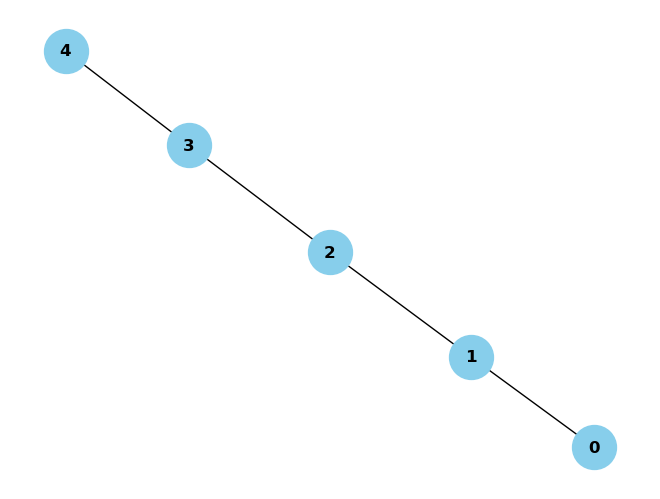

4
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


({1: 0, 0: 1, 2: 1, 3: 2, 4: 3},
 {1: [1], 0: [1, 0], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]})

In [151]:
import networkx as nx

# Створюємо граф G (шляховий граф з 5 вершинами)
G = nx.path_graph(5)

# Візуалізуємо граф
pos = nx.spring_layout(G)  # Позиціонування вершин графа
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")  # Візуалізація графа
plt.show()  # Відображення графа

# Знаходимо найкоротший шлях від вершини 0 до всіх інших вершин та їх довжини
length, path = nx.single_source_dijkstra(G, 0)

# Виводимо довжину найкоротшого шляху від вершини 0 до вершини 4
print(length[4])

# Виводимо всі довжини найкоротших шляхів від вершини 0 до всіх інших вершин
print(length)

# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини
nx.single_source_dijkstra(G, source=1)


### Алгоритм Белмана-Форда

Його складність $O(|V||E|)$ (гірше, ніж у алгоритму Дейкстри), проте він *дозволяє працювати з негативними вагами*. Нижче наведено код обчислення найкоротшого шляху за допомогою алгоритма Беллмана–Форда.


In [154]:
import networkx as nx

# Створюємо граф G (шляховий граф з 5 вершинами)
G = nx.path_graph(5)

# Знаходимо найкоротший шлях від вершини 0 до всіх інших вершин та їх довжини
length = nx.single_source_bellman_ford_path_length(G, 0)

# Виводимо довжину найкоротшого шляху від вершини 0 до вершини 4
print(length[4])

# Виводимо всі довжини найкоротших шляхів від вершини 0 до всіх інших вершин
print(length)

# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини
nx.single_source_bellman_ford_path_length(G, source=1) 


4
{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


{1: 0, 0: 1, 2: 1, 3: 2, 4: 3}

### Пошук в глибину (DFS)

*Пошук у глибину (Depth-first search, DFS)* – один з методів обходу графа. Стратегія пошуку в глибину, як можна зрозуміти з її назви, полягає у тому, щоб проникнути «вглиб» графа настільки, наскільки це можливо. Під час виконання алгоритму пошуку використовується рекурсивний підхід: перебираються всі ребра, що виходять з поточної вершини. Якщо ребро вказує на вершину, яка ще не була розглянута, то запускається алгоритм пошуку від цієї нової вершини. Після завершення виконання алгоритму повертаємося і продовжуємо перебирати ребра. Повернення відбувається, коли в поточній вершині більше не залишилося ребер, що вказують на невідвідану вершину. Якщо після завершення алгоритму ще залишилися невідвідані вершини, то необхідно запустити алгоритм пошуку від однієї з цих вершин.

Основна мета алгоритму DFS полягає в тому, щоб систематично відвідувати всі вершини та ребра графа. Це може бути використано для вирішення різних задач, таких як:
* 
Пошук шляху або циклу в графі* .
Визначення компонентів зв'язності граф* а.
Пошук компонентів сильної зв'язності в оргра* фі.
Визначення артикуляційних вершин та мостів в гр* афі.
Пошук топологічного порядку в DAG (Directed Acyclic Graph) 
тощо.
DFS може бути використаний для різних задач з обробки графів та вирішення багатьох алгоритмічних проблем.


Розглянемо приклад. Спочатку необхідно візуалізувати граф, який складається з шести вершин і шести ребер. Кожна вершина має бути позначена великою літерою (A, B, C, D, E, F), а ребра між вершинами мають бути зображені лініями. До того ж, граф повинен бути побудований з використанням алгоритму весняного розташування для розміщення вершин на площині. Величина вершин повинна бути задана значенням 700, а розміри міток вершин – шрифтом розміром 20 із сімейством шрифту sans-serif.


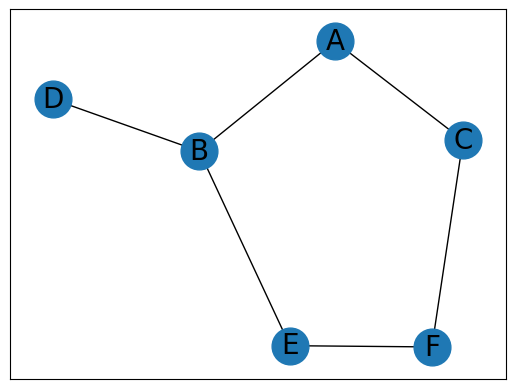

In [157]:
# Виклик magic-команди, яка автоматично відображає графіки у рядку
%matplotlib inline

# Імпорт необхідних бібліотек
import networkx as nx
import matplotlib.pyplot as plt

# Створення пустого графа
G = nx.Graph()

# Додавання вершин та ребер
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'),
                  ('B', 'E'), ('C', 'F'), ('E', 'F')])

# Визначення позицій вершин для відображення графа
pos = nx.spring_layout(G)

# Візуалізація вершин та їх міток
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=G.edges())

# Показ графіка
plt.show()


*Розглянемо задачу знаходження всіх можливих шляхів від вершини C до вершини F в зазначеному графі*. 

Для цього використовується алгоритм пошуку в глибину (DFS), який дозволяє обійти всі вершини графа та знайти всі можливі шляхи між двома заданими вершинами.

In [163]:
# Функція dfs використовує алгоритм пошуку в глибину (DFS) для обходу графа.
# Починаючи з вершини start, вона відвідує всі вершини графа, до яких можна дійти з цієї вершини,
# та повертає список відвіданих вершин.
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()  # Створюємо пустий набір для збереження відвіданих вершин
    visited.add(start)  # Додаємо поточну вершину до відвіданих
    # Перебираємо всі сусідні вершини поточної вершини
    for next in set(graph.adj[start].keys()) - visited:
        # Рекурсивно викликаємо функцію dfs для наступної вершини
        dfs(graph, next, visited)
    return visited

# Викликаємо функцію dfs з графом G та початковою вершиною 'C'
dfs(G, 'C')

# Функція dfs_paths також використовує алгоритм пошуку в глибину (DFS),
# але вона знаходить всі можливі шляхи з початкової вершини до цільової вершини.
# Параметр path використовується для зберігання поточного шляху.
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]  # Починаємо з початкової вершини
    if start == goal:
        yield path  # Якщо досягли цільової вершини, повертаємо шлях
    # Перебираємо всі сусідні вершини поточної вершини, які ще не відвідані
    for next in set(graph.adj[start].keys()) - set(path):
        # Рекурсивно викликаємо функцію dfs_paths для наступної вершини
        yield from dfs_paths(graph, next, goal, path + [next])

# Викликаємо функцію dfs_paths з графом G, початковою вершиною 'C' та цільовою вершиною 'F'
list(dfs_paths(G, 'C', 'F'))

[['C', 'F'], ['C', 'A', 'B', 'E', 'F']]


[['C', 'F'], ['C', 'A', 'B', 'E', 'F']]

### Пошук у ширину

* Пошук у ширину (breadth-first search, BFS)* – це метод обходу графа та пошуку шляхів у ньому. Він відповідає за послідовний перегляд рівнів графа, розпочинаючи з вихідного вузла $u$.

* На кожному кроці алгоритму розглядаються всі ребра$ (u,v$), що виходять з вузла$ $u. Якщо наступний вузол$ $v є цільовим вузлом, то пошук завершується
*  в іншому випадку вузол$ $v додається в чергу для подальшого розгляду. Після перевірки всіх ребер, що виходять з вузла$ $u, з черги вилучається наступний вузол$ $u, і процес повторюється.

In [166]:
def bfs_paths(graph, start, goal):
    # Створення черги з початковою вершиною та її шляхом
    queue = [(start, [start])]
    # Поки черга не порожня
    while queue:
        # Вибір вершини та її шляху спочатку черги
        (vertex, path) = queue.pop(0)
        # Для кожної сусідньої вершини
        for next in set(graph.adj[vertex].keys()) - set(path):
            # Якщо сусідня вершина є цільовою
            if next == goal:
                # Повернення шляху, якщо досягнуто цільову вершину
                yield path + [next]
            else:
                # Додавання сусідньої вершини та нового шляху в чергу
                queue.append((next, path + [next]))
# Виведення усіх шляхів від вершини 'A' до вершини 'F' за допомогою пошуку в ширину
list(bfs_paths(G, 'A', 'F'))

[['A', 'C', 'F'], ['A', 'B', 'E', 'F']]

### Завдання на самостійну роботу:

__Завдання на самостійну роботу__:

* Для варіанта, заданого викладачем, задати і візуалізувати граф за допомогою коду, наведеного у цій роботі
* 2.	Для свого варіанта реалізувати всі алгоритми, згідно з прикладами, наведеними вище

#### Візуалізувати граф [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30), (2,5,35)]

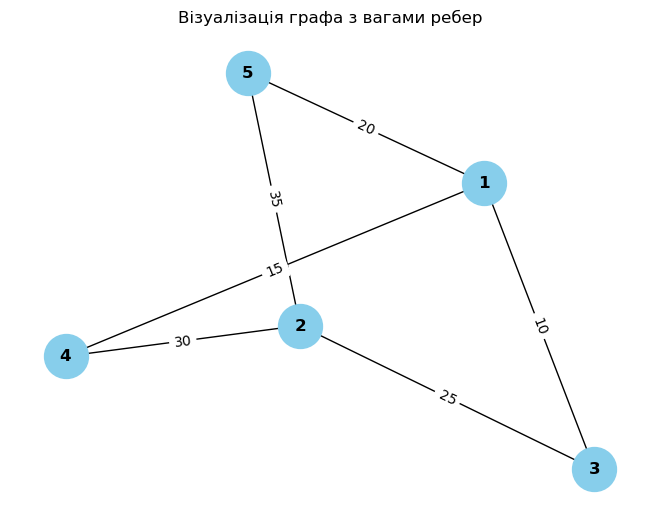

In [171]:
import matplotlib.pyplot as plt
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра з вагами
edges = [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30), (2,5,35)]

# Додаємо ребра з вагами до графа
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Визначаємо позиції вершин у графі
pos = nx.spring_layout(G)

# Візуалізуємо граф
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
# Додаємо ваги ребер
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Візуалізація графа з вагами ребер")
plt.show()


#### Для свого варіанта реалізувати всі алгоритми, згідно з прикладами, наведеними вище

Алгоритм Дейкстри

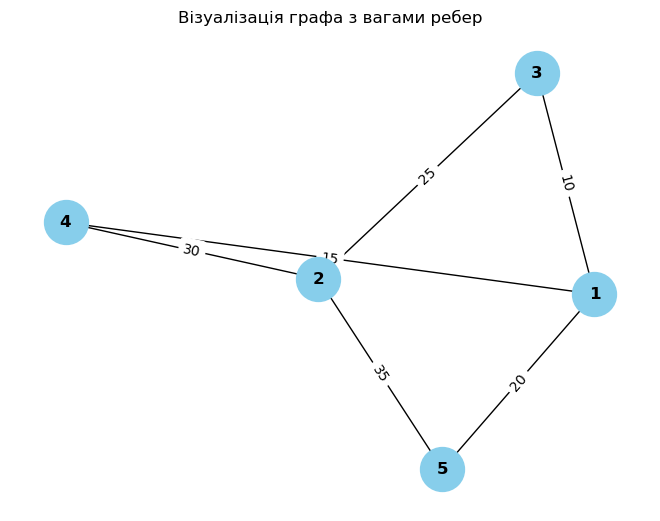

15
{1: 0, 3: 10, 4: 15, 5: 20, 2: 35}


({2: 0, 3: 25, 4: 30, 5: 35, 1: 35},
 {2: [2], 3: [2, 3], 4: [2, 4], 5: [2, 5], 1: [2, 3, 1]})

In [174]:
import matplotlib.pyplot as plt
import networkx as nx

# Створюємо граф
G = nx.Graph()

# Додаємо ребра з вагами
edges = [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30), (2,5,35)]

# Додаємо ребра з вагами до графа
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Визначаємо позиції вершин у графі
pos = nx.spring_layout(G)

# Візуалізуємо граф
nx.draw(G, pos, with_labels=True, node_size=1000, node_color="skyblue", font_size=12, font_weight="bold")
# Додаємо ваги ребер
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Візуалізація графа з вагами ребер")
plt.show()

length, path = nx.single_source_dijkstra(G, 1)

# Виводимо довжину найкоротшого шляху від вершини 1 до вершини 4
print(length[4])

# Виводимо всі довжини найкоротших шляхів від вершини 1 до всіх інших вершин
print(length)

# Знаходимо найкоротший шлях від вершини 2 до всіх інших вершин та їх довжини
nx.single_source_dijkstra(G, source=2)


Алгоритм Белмана-Форда

In [176]:
import networkx as nx

# Створюємо граф G (шляховий граф з 5 вершинами)
G = nx.Graph()

# Додаємо ребра з вагами
edges = [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30), (2,5,35)]

# Додаємо ребра з вагами до графа
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Знаходимо найкоротший шлях від вершини 1 до всіх інших вершин та їх довжини
length = nx.single_source_bellman_ford_path_length(G, 1)

# Виводимо довжину найкоротшого шляху від вершини 1 до вершини 4
print(length[4])

# Виводимо всі довжини найкоротших шляхів від вершини 0 до всіх інших вершин
print(length)

# Знаходимо найкоротший шлях від вершини 2 до всіх інших вершин та їх довжини
nx.single_source_bellman_ford_path_length(G, source=2) 


15
{1: 0, 3: 10, 4: 15, 5: 20, 2: 35}


{2: 0, 3: 25, 4: 30, 5: 35, 1: 35}

Пошук в глибину DFS

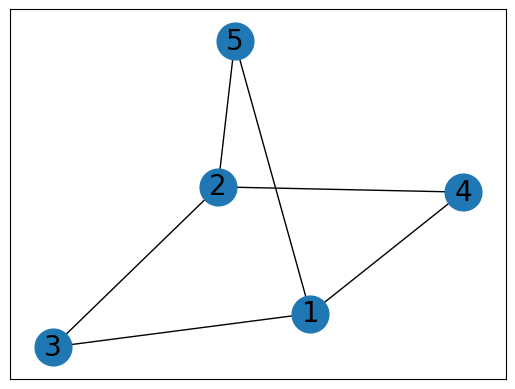

In [179]:
# Виклик magic-команди, яка автоматично відображає графіки у рядку
%matplotlib inline

# Імпорт необхідних бібліотек
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Додаємо ребра з вагами
edges = [(1,3,10), (1,4,15), (1,5,20), (2,3,25), (2,4,30), (2,5,35)]

# Додаємо ребра з вагами до графа
for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])

# Визначення позицій вершин для відображення графа
pos = nx.spring_layout(G)

# Візуалізація вершин та їх міток
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')

# Візуалізація ребер
nx.draw_networkx_edges(G, pos, edgelist=G.edges())

# Показ графіка
plt.show()


In [180]:
# Функція dfs використовує алгоритм пошуку в глибину (DFS) для обходу графа.
# Починаючи з вершини start, вона відвідує всі вершини графа, до яких можна дійти з цієї вершини,
# та повертає список відвіданих вершин.
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()  # Створюємо пустий набір для збереження відвіданих вершин
    visited.add(start)  # Додаємо поточну вершину до відвіданих
    # Перебираємо всі сусідні вершини поточної вершини
    for next in set(graph.adj[start].keys()) - visited:
        # Рекурсивно викликаємо функцію dfs для наступної вершини
        dfs(graph, next, visited)
    return visited

# Викликаємо функцію dfs з графом G та початковою вершиною '3'
dfs(G, 3)

# Функція dfs_paths також використовує алгоритм пошуку в глибину (DFS),
# але вона знаходить всі можливі шляхи з початкової вершини до цільової вершини.
# Параметр path використовується для зберігання поточного шляху.
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]  # Починаємо з початкової вершини
    if start == goal:
        yield path  # Якщо досягли цільової вершини, повертаємо шлях
    # Перебираємо всі сусідні вершини поточної вершини, які ще не відвідані
    for next in set(graph.adj[start].keys()) - set(path):
        # Рекурсивно викликаємо функцію dfs_paths для наступної вершини
        yield from dfs_paths(graph, next, goal, path + [next])

# Викликаємо функцію dfs_paths з графом G, початковою вершиною '3' та цільовою вершиною '5'
list(dfs_paths(G, 3, 5))

[[3, 1, 4, 2, 5], [3, 1, 5], [3, 2, 4, 1, 5], [3, 2, 5]]

Пошук в ширину BFS

In [182]:
def bfs_paths(graph, start, goal):
    # Створення черги з початковою вершиною та її шляхом
    queue = [(start, [start])]
    # Поки черга не порожня
    while queue:
        # Вибір вершини та її шляху спочатку черги
        (vertex, path) = queue.pop(0)
        # Для кожної сусідньої вершини
        for next in set(graph.adj[vertex].keys()) - set(path):
            # Якщо сусідня вершина є цільовою
            if next == goal:
                # Повернення шляху, якщо досягнуто цільову вершину
                yield path + [next]
            else:
                # Додавання сусідньої вершини та нового шляху в чергу
                queue.append((next, path + [next]))
# Виведення усіх шляхів від вершини '1' до вершини '5' за допомогою пошуку в ширину
list(bfs_paths(G, 1, 5))

[[1, 5], [1, 3, 2, 5], [1, 4, 2, 5]]

## Завдання на лабораторну роботу

1. Створити Notebook-документ і реалізувати приклади, що розглядаються у цій роботі, та виконати завдання до самостійної роботи.
2. Надати відповіді на контрольні питання.
3. Робочий документ оформити у вигляді Notebook-документа (файл .ipynb).
4. Скомпілювати звіт у форматі .html. Для цього необхідно завантажити термінал у робочому каталозі й у командному рядку запустити таку коман
ду:
jupyter nbconvert lab_8_StudentLastName.ipynb --to 

html
або, якщо наявна робота з налагодженим середовищем Qu
arto:
quarto preview lab_8_StudentLastName

ipynb
Проєкт має складатися мінімум з двох файлів: lab_8_StudentLastName.ipynb та lab_8_StudentLastName
.5tml. 
5. Дати відповіді на контрольні запитання.

## Контрольні запитання

1. Що таке граф у термінах теорії графів? Наведіть приклади реальних ситуацій, де можна застосовувати графи.

Граф — це сукупність об'єктів із зв'язками між ними. Графи застосовуються в географічни картах (побудова оптимального шляху), мікросхемах, комп'ютерних мережах (побудова модель мережі, визначення оптимальних маршрутів, критичних вузлів), соціальна мережа.

2. Які головні види графів існують? Наведіть відмінності між орієнтованими і неорієнтованими графами.

Основні види: орієнтований, неорієнтований, ациклічний. У орієнтованому графі ребра мають напрямок.

3. Як можна подати граф у пам’яті комп'ютера? Опишіть структури даних, які використовуються для зберігання графів.

Граф можна подати у вигляді матриці суміжності та списку суміжності.

4. Як працює алгоритм пошуку в ширину (BFS) на графах? Наведіть приклади ситуацій, де застосовується цей алгоритм.


* Пошук у ширину – це метод обходу графа та пошуку шляхів у ньому. Він відповідає за послідовний перегляд рівнів графа, розпочинаючи з вихідного вузла $u$.

* На кожному кроці алгоритму розглядаються всі ребра$ (u,v$), що виходять з вузла$ $u. Якщо наступний вузол$ $v є цільовим вузлом, то пошук завершується
*  в іншому випадку вузол$ $v додається в чергу для подальшого розгляду. Після перевірки всіх ребер, що виходять з вузла$ $u, з черги вилучається наступний вузол$ $u, і процес повторюється.

Використовується для пошуку шляхів, пошук оптимального шляху.

5. Що таке алгоритм пошуку в глибину (DFS) на графах? Як він відрізняється від BFS? Надайте приклади задач, де використовується DFS.

Стратегія пошуку в глибину полягає у тому, щоб проникнути «вглиб» графа настільки, наскільки це можливо. Під час виконання алгоритму пошуку використовується рекурсивний підхід: перебираються всі ребра, що виходять з поточної вершини. Якщо ребро вказує на вершину, яка ще не була розглянута, то запускається алгоритм пошуку від цієї нової вершини.

В BFS ми розглядаємо усі ребра, а в DFS ми йдемо в максимально вглиб по одній лінії, і тільки потім повертаємось до інших вершин.

Використовується в пошуку шляху або циклу в графі, у визначенні компонентів зв’язності граф, пошуку компонентів сильної зв’язності в орграфі, визначенні артикуляційних вершин та мостів в графі, топологічному сортуванні.

6. Опишіть алгоритм Дейкстри для пошуку найкоротшого шляху в графі. Які умови повинні виконуватися для успішної роботи цього алгоритму?

Принцип роботи:

Ініціалізуємо масив Найкоротший[ ] так, що Найкоротший[s] = 0, а
Найкоротший[v] = нескінченність для всіх інших вершин v.

Ініціалізуємо чергу з пріоритетами Q, додаючи всі вершини графа разом
з відстанню до них у Найкоротший[].

Доки черга Q не порожня:
 Вилучаємо вершину u з найменшою відстанню з Q.
 Для кожного сусіднього вузла v з вершини u:
 – Викликаємо процедуру Релаксація(u, v), яка:
 – Якщо Найкоротший[u] + вага(u, v) < Найкоротший[v]:
 – Зменшуємо ключ Q для вершини v на нову відстань
(Найкоротший[u] + вага(u, v)).

По завершенні алгоритму масив Найкоротший[] містить найкоротші
відстані від вершини 𝑠 до всіх інших вершин графа.

Граф не повинен містити циклів з від’ємною вагою.